# DBSCAN

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

## DBSCAN and Clustering Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wholesome_customers_data.csv')

In [3]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## EDA

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

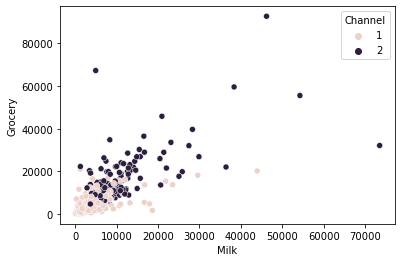

In [7]:
sns.scatterplot(data=df, x="Milk", y="Grocery", hue="Channel")

<AxesSubplot:xlabel='Milk', ylabel='Count'>

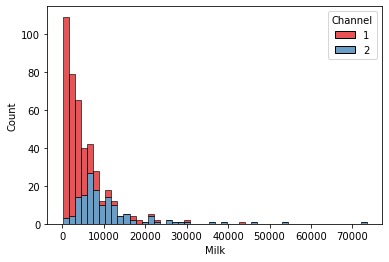

In [9]:
sns.histplot(data=df, x="Milk", hue="Channel", palette="Set1", multiple="stack")

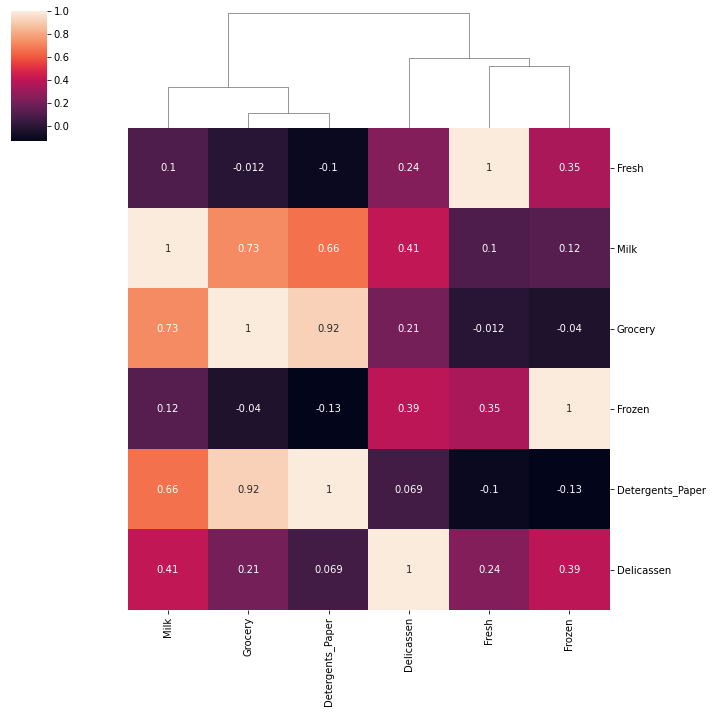

In [12]:
sns.clustermap(df.drop(["Region","Channel"], axis=1).corr(), annot=True, row_cluster=False)

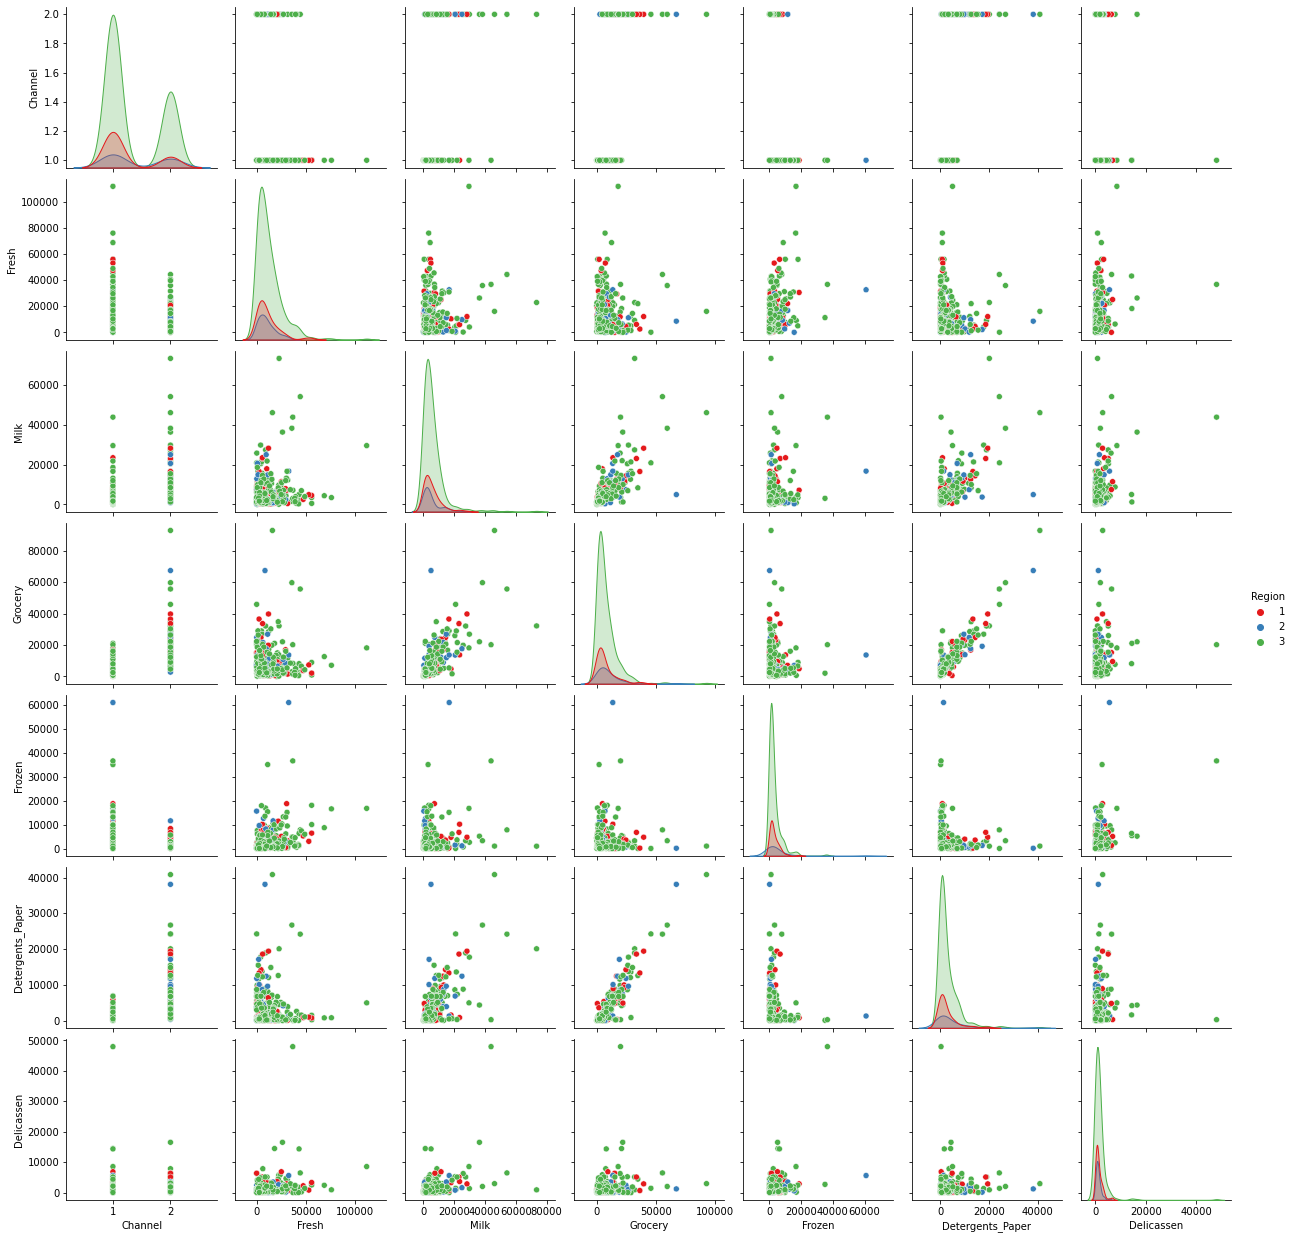

In [13]:
sns.pairplot(df, hue="Region", palette="Set1")

## ML Model

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
scaled_X = scaler.fit_transform(df)

In [16]:
from sklearn.cluster import DBSCAN

In [17]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):

    dbscan = DBSCAN(eps=eps, min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)

    perc_outliers = 100*np.sum(dbscan.labels_== -1) / len(dbscan.labels_)

    outlier_percent.append(perc_outliers)

<AxesSubplot:>

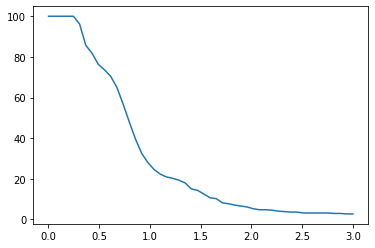

In [19]:
sns.lineplot(x=np.linspace(0.001,3,50), y=outlier_percent)

In [20]:
dbscan = DBSCAN(eps=2, min_samples=scaled_X.shape[1])

In [21]:
dbscan.fit(scaled_X)

DBSCAN(eps=2, min_samples=8)

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

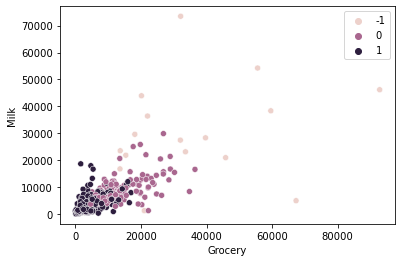

In [22]:
sns.scatterplot(data=df,x='Grocery',y='Milk',hue=dbscan.labels_)

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

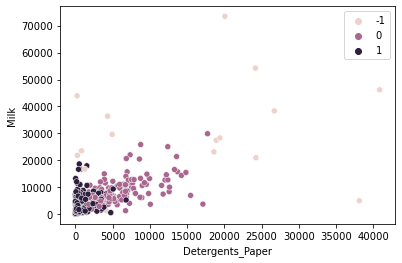

In [23]:
sns.scatterplot(data=df,x='Detergents_Paper',y='Milk',hue=dbscan.labels_)

In [24]:
df["Labels"] = dbscan.labels_

In [25]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [27]:
cats = df.drop(["Channel","Region"], axis=1)
cat_mean = cats.groupby("Labels").mean()
cat_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,28678.285714,24176.523810,28797.857143,11535.000000,11932.523810,7367.380952
0,8134.862595,8909.916031,14004.427481,1450.595420,6080.832061,1533.519084
1,12542.430556,3039.760417,3677.871528,3192.315972,766.267361,1094.920139


<AxesSubplot:ylabel='Labels'>

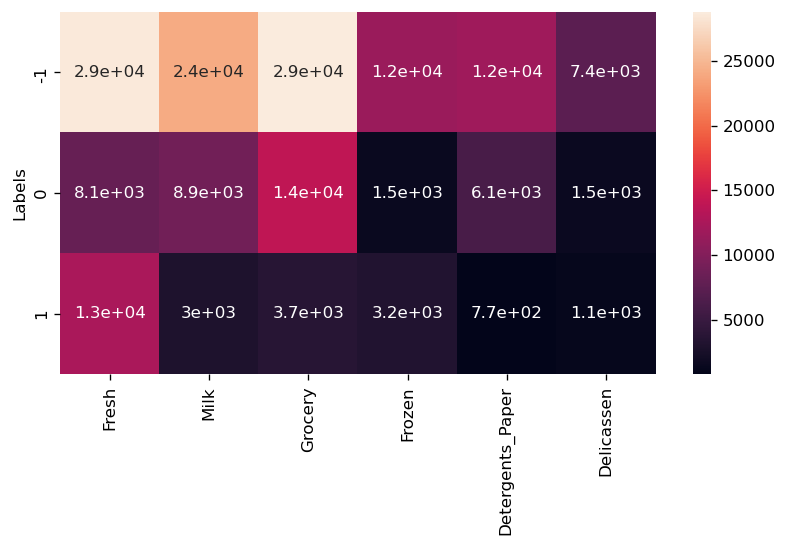

In [34]:
plt.figure(figsize=(8,4), dpi=120)
sns.heatmap(cat_mean, annot=True)

<AxesSubplot:ylabel='Labels'>

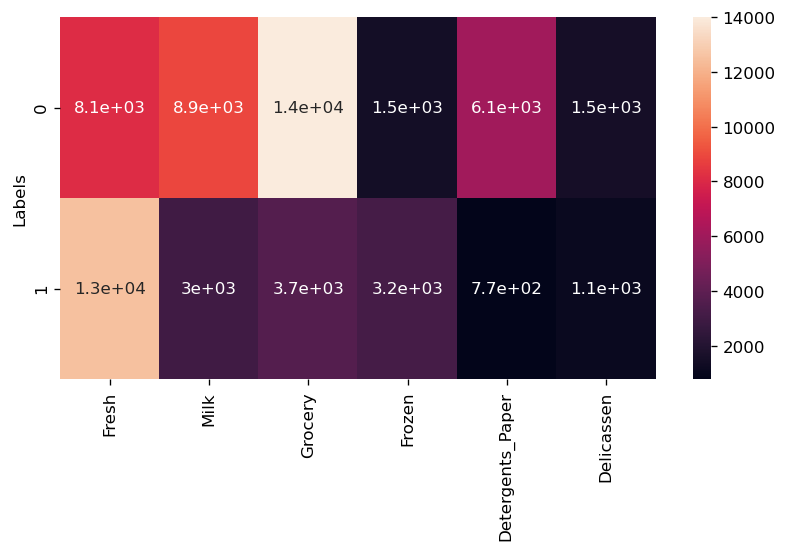

In [39]:
plt.figure(figsize=(8,4), dpi=120)
sns.heatmap(cat_mean.loc[[0,1]], annot=True)

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
data=scaler.fit_transform(cat_mean)
scaled_cat = pd.DataFrame(data, cat_mean.index, cat_mean.columns)

<AxesSubplot:ylabel='Labels'>

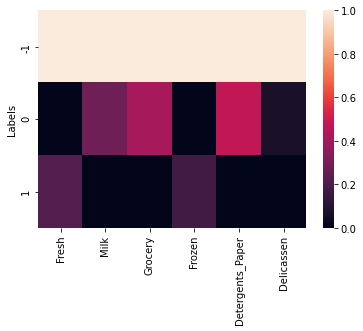

In [43]:
sns.heatmap(pd.DataFrame(data, cat_mean.index, cat_mean.columns))

<AxesSubplot:ylabel='Labels'>

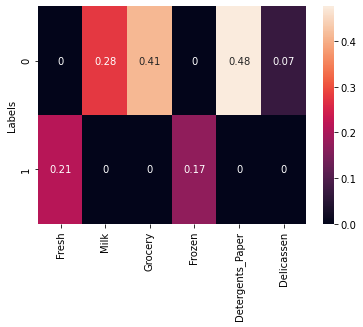

In [46]:
sns.heatmap(scaled_cat.loc[[0,1]],annot=True)